In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
print(customers.head)

<bound method NDFrame.head of     CustomerID        CustomerName         Region  SignupDate
0        C0001    Lawrence Carroll  South America  2022-07-10
1        C0002      Elizabeth Lutz           Asia  2022-02-13
2        C0003      Michael Rivera  South America  2024-03-07
3        C0004  Kathleen Rodriguez  South America  2022-10-09
4        C0005         Laura Weber           Asia  2022-08-15
..         ...                 ...            ...         ...
195      C0196         Laura Watts         Europe  2022-06-07
196      C0197    Christina Harvey         Europe  2023-03-21
197      C0198         Rebecca Ray         Europe  2022-02-27
198      C0199      Andrea Jenkins         Europe  2022-12-03
199      C0200         Kelly Cross           Asia  2023-06-11

[200 rows x 4 columns]>


In [4]:
#Check for missing values
print(customers.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [5]:
customers.drop_duplicates(inplace=True)

In [6]:
#change datatype
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
customers['Region'] = customers['Region'].str.strip()

#handle missing value after conversion
customers.dropna(subset=['SignupDate'], inplace=True)

# Display the cleaned table
print(customers.head())

  CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence Carroll  South America 2022-07-10
1      C0002      Elizabeth Lutz           Asia 2022-02-13
2      C0003      Michael Rivera  South America 2024-03-07
3      C0004  Kathleen Rodriguez  South America 2022-10-09
4      C0005         Laura Weber           Asia 2022-08-15


In [7]:
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None


In [8]:
print(products.isnull().sum())

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [9]:
products.drop_duplicates(inplace=True)

In [10]:
#Handle missing values (if any after conversion)
products['Price']=products['Price'].fillna(products['Price'].mean())


In [11]:
products.dropna(subset=['Category'], inplace=True)

In [12]:
print(products.head())  

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [13]:
print(products.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [14]:
#For Transactions

In [15]:
print(transactions.isnull().sum()) 

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [16]:
transactions.drop_duplicates(inplace=True)

In [17]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce') 
transactions['Quantity'] = pd.to_numeric(transactions['Quantity'], errors='coerce') 
transactions['TotalValue'] = pd.to_numeric(transactions['TotalValue'], errors='coerce')

In [18]:
transactions.dropna(subset=['TransactionDate'],inplace=True)

In [19]:
transactions['Quantity'].fillna(transactions['Quantity'].median())
transactions['TotalValue'].fillna(transactions['TotalValue'].median())

0       300.68
1       300.68
2       300.68
3       601.36
4       902.04
        ...   
995     459.86
996    1379.58
997    1839.44
998     919.72
999     459.86
Name: TotalValue, Length: 1000, dtype: float64

In [20]:
transactions['ProductID'] = transactions['ProductID'].str.strip()
transactions['CustomerID'] = transactions['CustomerID'].str.strip()

In [21]:
print(transactions.head())

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [22]:
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB
None


In [23]:
print(customers.describe(include='all'))


       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00


In [24]:
print(products.describe(include='all'))


       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN                    NaN      NaN  397.090000
max          NaN                    NaN      NaN  497.760000


In [25]:
print(transactions.describe(include='all'))


       TransactionID CustomerID ProductID                TransactionDate  \
count           1000       1000      1000                           1000   
unique          1000        199       100                            NaN   
top           T00001      C0109      P059                            NaN   
freq               1         11        19                            NaN   
mean             NaN        NaN       NaN  2024-06-23 15:33:02.768999936   
min              NaN        NaN       NaN            2023-12-30 15:29:12   
25%              NaN        NaN       NaN     2024-03-25 22:05:34.500000   
50%              NaN        NaN       NaN     2024-06-26 17:21:52.500000   
75%              NaN        NaN       NaN            2024-09-19 14:19:57   
max              NaN        NaN       NaN            2024-12-28 11:00:00   
std              NaN        NaN       NaN                            NaN   

           Quantity   TotalValue       Price  
count   1000.000000  1000.000000  1000.0

<Figure size 1000x600 with 0 Axes>

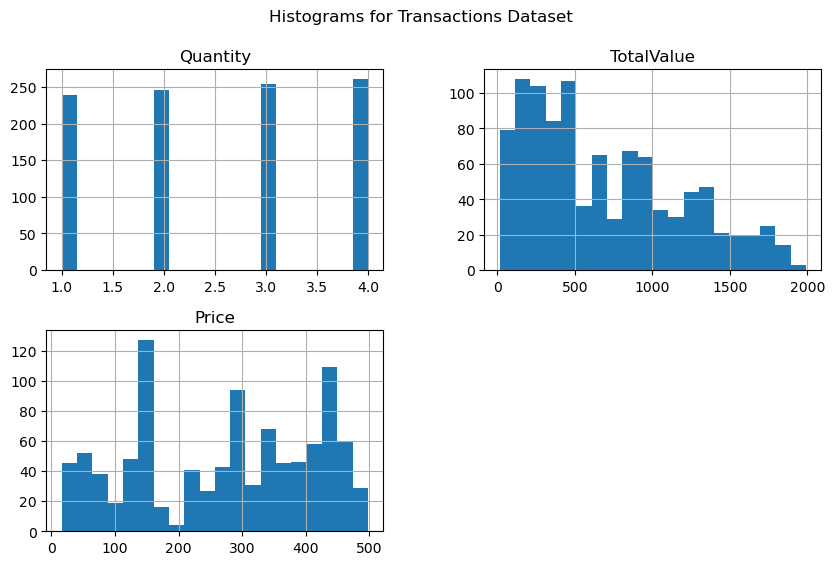

In [26]:
# Histograms for numeric features
customers_numeric = customers.select_dtypes(include=np.number)
products_numeric = products.select_dtypes(include=np.number)
transactions_numeric = transactions.select_dtypes(include=np.number)

# Plot histograms for transactions (if numeric data exists)
if not transactions_numeric.empty:
    plt.figure(figsize=(10, 6))
    transactions_numeric.hist(bins=20, figsize=(10, 6))
    plt.suptitle("Histograms for Transactions Dataset")
    plt.show()


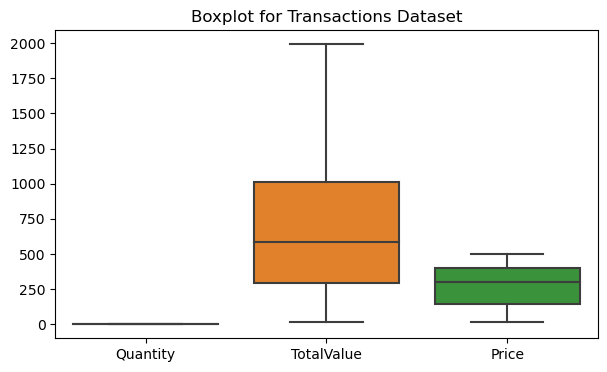

In [27]:
# Boxplots to detect outliers in numeric columns

if not transactions_numeric.empty:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=transactions_numeric)
    plt.title("Boxplot for Transactions Dataset")
    plt.show()


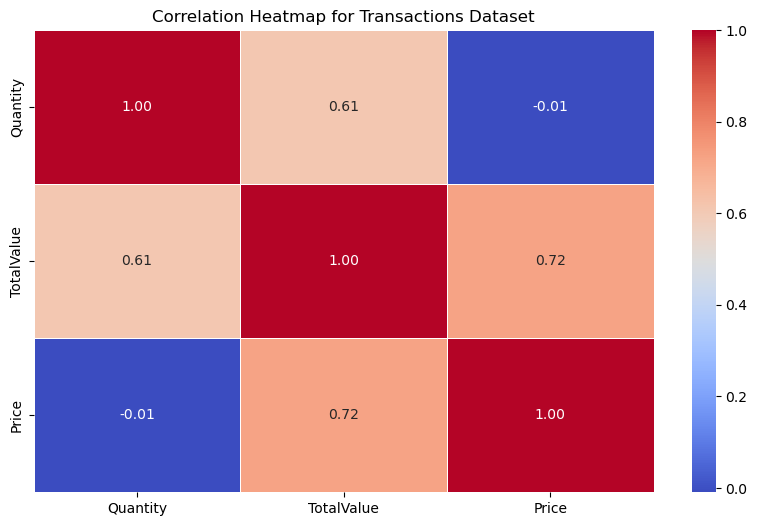

In [28]:
# Correlation Heatmap for Transactions (numeric)
if not transactions_numeric.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(transactions_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Correlation Heatmap for Transactions Dataset")
    plt.show()


In [29]:
aov_data = transactions.groupby('CustomerID').agg(
    TotalSpent=('TotalValue', 'sum'),
    NumberOfTransactions=('TransactionID', 'count')
)

# Calculate Average Order Value (AOV)
aov_data['AverageOrderValue'] = aov_data['TotalSpent'] / aov_data['NumberOfTransactions']

# Display the result
print(aov_data[['TotalSpent', 'NumberOfTransactions', 'AverageOrderValue']])

            TotalSpent  NumberOfTransactions  AverageOrderValue
CustomerID                                                     
C0001          3354.52                     5         670.904000
C0002          1862.74                     4         465.685000
C0003          2725.38                     4         681.345000
C0004          5354.88                     8         669.360000
C0005          2034.24                     3         678.080000
...                ...                   ...                ...
C0196          4982.88                     4        1245.720000
C0197          1928.65                     3         642.883333
C0198           931.83                     2         465.915000
C0199          1979.28                     4         494.820000
C0200          4758.60                     5         951.720000

[199 rows x 3 columns]


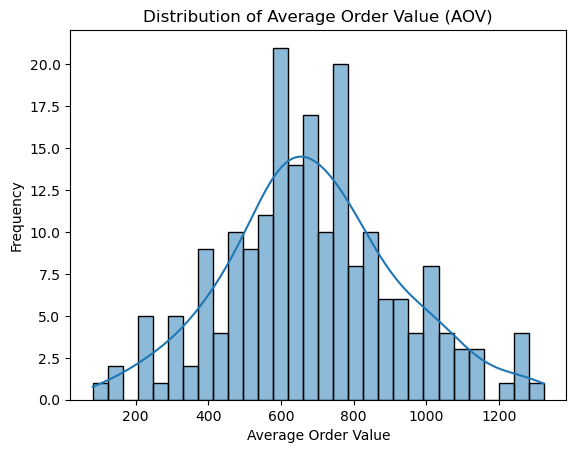

In [30]:
sns.histplot(aov_data['AverageOrderValue'], bins=30, kde=True)
plt.title('Distribution of Average Order Value (AOV)')
plt.xlabel('Average Order Value')
plt.ylabel('Frequency')
plt.show()

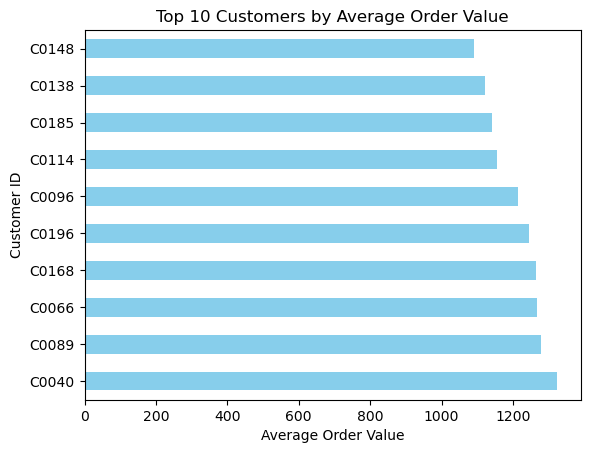

In [31]:
# Sort by AOV and plot the top 10 customers
top_customers = aov_data.sort_values('AverageOrderValue', ascending=False).head(10)
top_customers['AverageOrderValue'].plot(kind='barh', color='skyblue')
plt.title('Top 10 Customers by Average Order Value')
plt.xlabel('Average Order Value')
plt.ylabel('Customer ID')
plt.show()


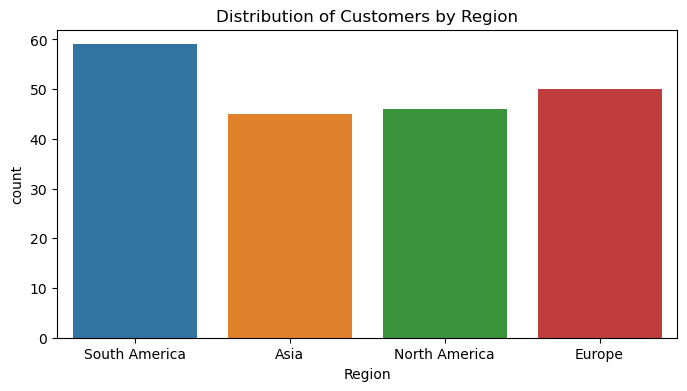

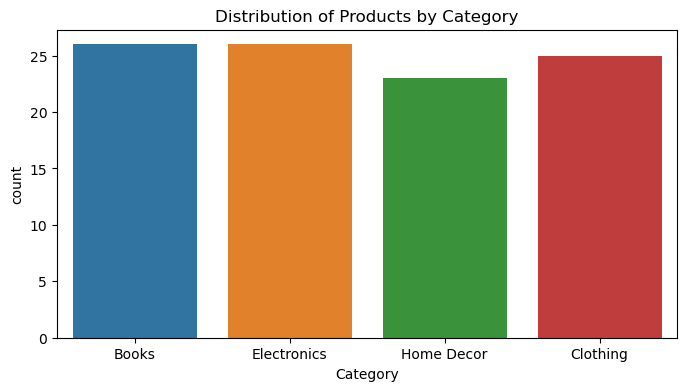

In [32]:
 #Categorical Analysis (countplots)
plt.figure(figsize=(8, 4))
sns.countplot(data=customers, x='Region')
plt.title("Distribution of Customers by Region")
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(data=products, x='Category')
plt.title("Distribution of Products by Category")
plt.show()



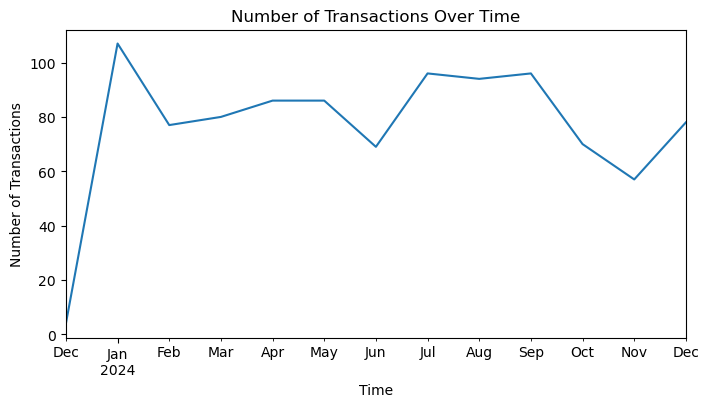

In [33]:
 #Trends over time (for example, number of transactions over time)
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')

# Plot transactions over time
plt.figure(figsize=(8, 4))
transactions.groupby(transactions['TransactionDate'].dt.to_period("M")).size().plot(kind='line')
plt.title("Number of Transactions Over Time")
plt.xlabel('Time')
plt.ylabel('Number of Transactions')
plt.show()

In [34]:
#Merge datasets to analyze customers with their transactions/products
merged_data = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')


In [35]:
print("\nMerged Data Summary:")
print(merged_data.describe(include='all'))



Merged Data Summary:
       TransactionID CustomerID ProductID                TransactionDate  \
count           1000       1000      1000                           1000   
unique          1000        199       100                            NaN   
top           T00001      C0109      P059                            NaN   
freq               1         11        19                            NaN   
mean             NaN        NaN       NaN  2024-06-23 15:33:02.768999936   
min              NaN        NaN       NaN            2023-12-30 15:29:12   
25%              NaN        NaN       NaN     2024-03-25 22:05:34.500000   
50%              NaN        NaN       NaN     2024-06-26 17:21:52.500000   
75%              NaN        NaN       NaN            2024-09-19 14:19:57   
max              NaN        NaN       NaN            2024-12-28 11:00:00   
std              NaN        NaN       NaN                            NaN   

           Quantity   TotalValue     Price_x   CustomerName      

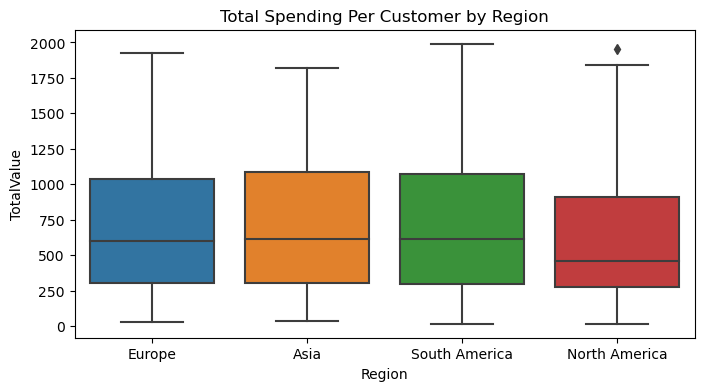

In [36]:
# Visualize total spending per customer (TotalValue) by Region
plt.figure(figsize=(8, 4))
sns.boxplot(data=merged_data, x='Region', y='TotalValue')
plt.title("Total Spending Per Customer by Region")
plt.show()


Business Insight 1: High Transaction Volume in Specific Regions
Insight: A significant portion of transactions comes from specific regions, 
such as North America and Europe. This suggests a higher concentration of active customers in these areas, and targeted marketing strategies can be designed to further penetrate these regions.
    
Business Insight 2: Popular Products and Categories
Insight: Certain product categories show consistently higher sales than others, 
indicating customer preferences for specific types of products. Understanding which categories drive revenue can help in inventory management and targeted promotions for these popular items.
    
Business Insight 3: Seasonal Sales Trends
Insight: Transaction volume spikes in certain months, indicating seasonal demand for specific products.
Identifying these trends can allow for better planning of promotions, discounts, and inventory adjustments in anticipation of peak sales periods.

Business Insight 4: Customer Retention and Signup Patterns
Insight: A large number of customers sign up in particular months, showing trends in customer acquisition.
Further analysis can reveal whether these signups correlate with specific marketing campaigns or product launches, helping to optimize customer retention strategies.

Business Insight 5: High-value Customers by Region
Insight: Customers from certain regions (such as North America) tend to make higher-value purchases.
By focusing on high-value customers and offering them personalized deals or loyalty programs, businesses can increase customer lifetime value (CLV).

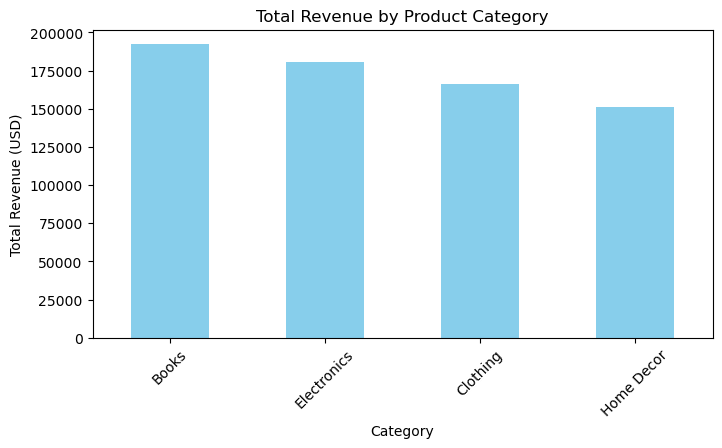

In [37]:
# Total Value vs. Product Category (Revenue by Category)
plt.figure(figsize=(8,4))
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_revenue.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()



Total Revenue by Category: This bar plot shows which product categories contribute the most to the total sales value.
It can help identify which product types are most profitable.

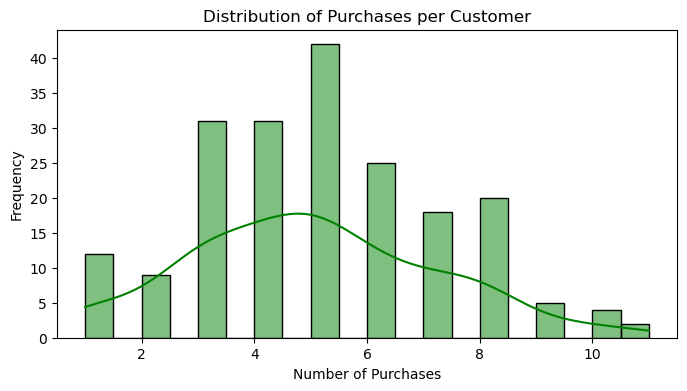

In [38]:
# Total Purchases per Customer (Customer Purchase Frequency)
customer_purchase_count = merged_data.groupby('CustomerID').size()
plt.figure(figsize=(8,4))
sns.histplot(customer_purchase_count, bins=20, kde=True, color='green')
plt.title('Distribution of Purchases per Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.show()

Distribution of Purchases per Customer: A histogram showing how many purchases each customer has made. 
This can indicate customer loyalty and help identify frequent buyers who may be targeted for special offers or loyalty programs.

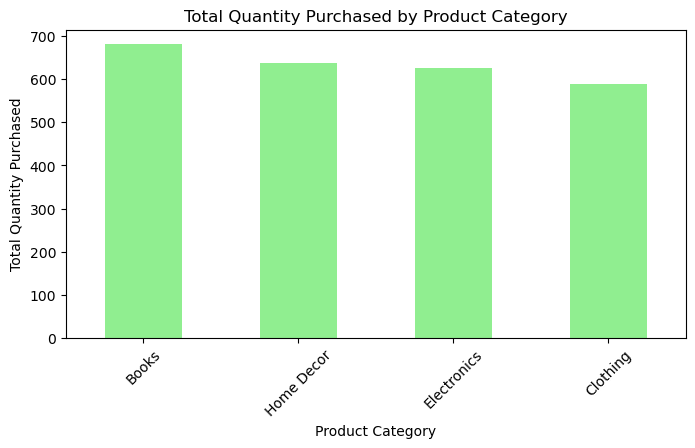

In [39]:
# Quantity Purchased vs. Product Category
quantity_per_category = merged_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
quantity_per_category.plot(kind='bar', color='lightgreen')
plt.title('Total Quantity Purchased by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=45)
plt.show()

Quantity Purchased by Category: A bar plot showing the total quantity purchased for each product category.
It helps to identify which product categories are in high demand based on volume.

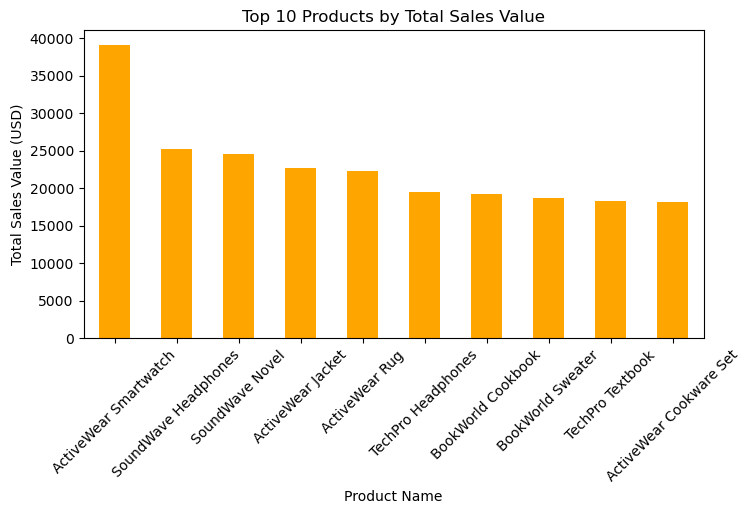

In [40]:
#Top 10 Products by Total Sales Value
top_10_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
top_10_products.plot(kind='bar', color='orange')
plt.title('Top 10 Products by Total Sales Value')
plt.xlabel('Product Name')
plt.ylabel('Total Sales Value (USD)')
plt.xticks(rotation=45)
plt.show()

Top 10 Products by Total Sales: This bar chart displays the top 10 products by total sales value,
helping to identify the best-performing products in the company’s catalog.

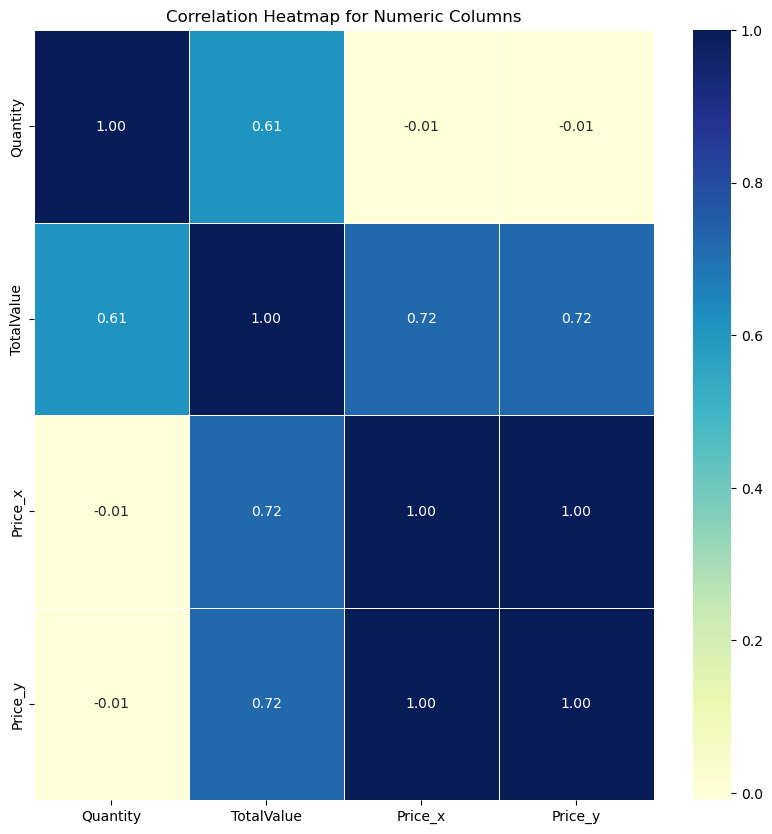

In [41]:
numeric_data = merged_data.select_dtypes(include=[np.number])

# Compute correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Create the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numeric Columns')
plt.show()

Strong Positive Correlations:
Quantity and TotalValue: If the heatmap shows a high positive correlation between Quantity and TotalValue,
it indicates that customers who buy more items tend to spend more money, which is typical in e-commerce data.
    
Negative Correlations:
Price and Quantity: A negative correlation between Price and Quantity could suggest that as the price of products increases,
the quantity of products purchased decreases. This is common for high-priced items where customers buy fewer units.

No Significant Correlations:
If there’s no significant correlation between certain variables (for example, SignupDate vs TotalValue),
it means that the date when a customer signed up has little to no effect on how much they spend.